Model Performance
-----------------
MAE : 11.53
R2  : 0.82


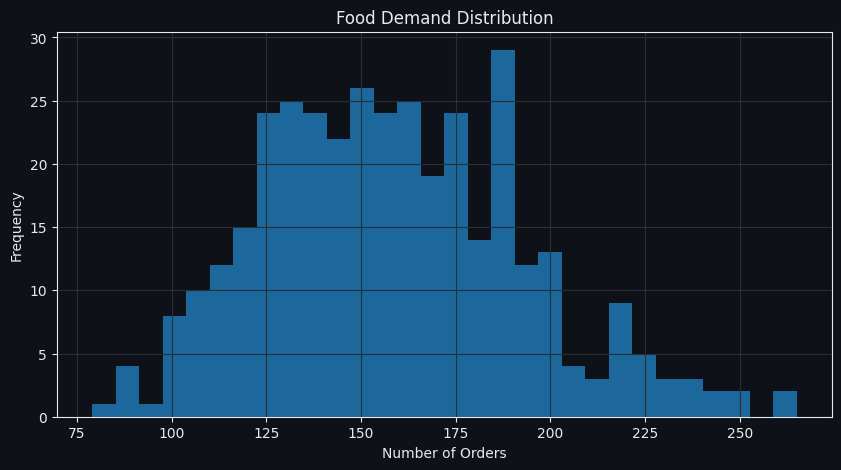

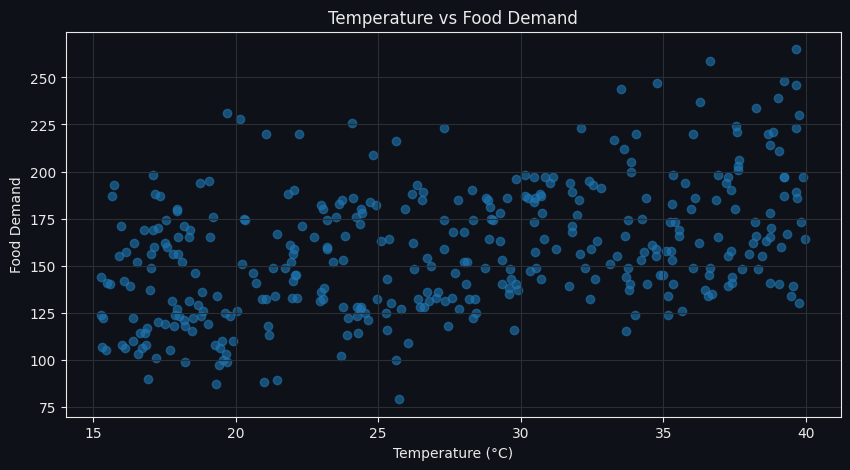

C:\Users\rajva\AppData\Local\Temp\ipykernel_6776\1315074999.py:57: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


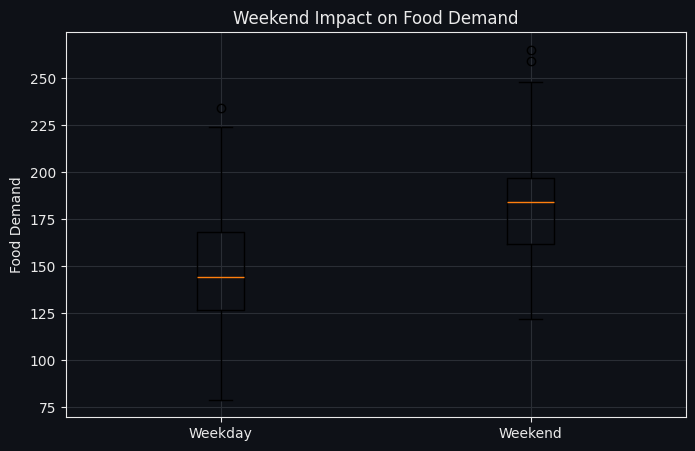

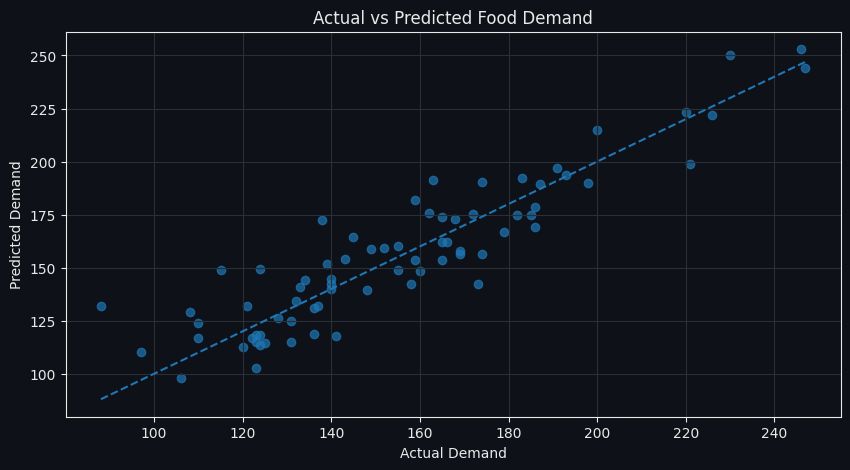

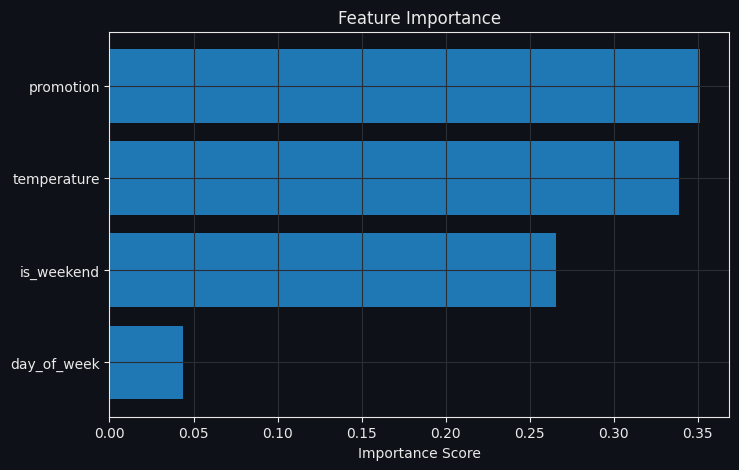

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv("food_demand_data.csv")

plt.rcParams.update({
    "figure.facecolor": "#0E1117",
    "axes.facecolor": "#0E1117",
    "axes.edgecolor": "#EAEAEA",
    "axes.labelcolor": "#EAEAEA",
    "text.color": "#EAEAEA",
    "xtick.color": "#EAEAEA",
    "ytick.color": "#EAEAEA",
    "grid.color": "#2A2E35",
})

X = df.drop("food_demand", axis=1)
y = df["food_demand"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Performance")
print("-----------------")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2  : {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(df["food_demand"], bins=30, alpha=0.85)
plt.title("Food Demand Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df["temperature"], df["food_demand"], alpha=0.6)
plt.title("Temperature vs Food Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Food Demand")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(
    [
        df[df["is_weekend"] == 0]["food_demand"],
        df[df["is_weekend"] == 1]["food_demand"]
    ],
    labels=["Weekday", "Weekend"]
)
plt.title("Weekend Impact on Food Demand")
plt.ylabel("Food Demand")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.title("Actual vs Predicted Food Demand")
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()
